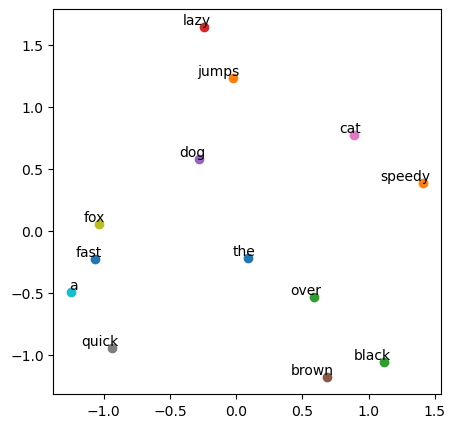

In [2]:
# 7 CONTINUOUS WORDS
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Lambda, Dense

# Corpus and tokenization
corpus = ["The quick brown fox jumps over the lazy dog.",
          "A fast brown dog jumps over the lazy cat.",
          "The speedy black cat jumps over the lazy dog."]
tok = Tokenizer()
tok.fit_on_texts(corpus)
seqs = tok.texts_to_sequences(corpus)
vocab_size = len(tok.word_index) + 1

# CBOW context-target generation
win, X, y = 2, [], []
for seq in seqs:
    for i in range(win, len(seq) - win):
        X.append(seq[i - win:i] + seq[i + 1:i + win + 1])
        y.append(seq[i])
X, y = np.array(X), np.array(y)

# Build CBOW model
model = Sequential([
    Embedding(vocab_size, 10, input_length=2*win),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(vocab_size, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=500, verbose=0)

# Extract and reduce embeddings
embeds = model.get_weights()[0]
reduced = PCA(n_components=2).fit_transform(embeds)

# Plot
plt.figure(figsize=(5, 5))
for word, i in tok.word_index.items():
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), textcoords='offset points', xytext=(5, 2), ha='right')
plt.show()